## Simple Linear Regression (3.1.1)

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv('./Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [48]:
x = data.loc[:,['YearsExperience']]
y = data.loc[:,['Salary']]

In [49]:
print(x.head())
print(y.head())

   YearsExperience
0              1.1
1              1.3
2              1.5
3              2.0
4              2.2
   Salary
0   39343
1   46205
2   37731
3   43525
4   39891


In [8]:
divide = np.random.rand(len(data))<=0.8
divide

array([ True, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False])

In [11]:
training_set = data[divide]
testing_set = data[~divide]

In [12]:
print(testing_set)

    YearsExperience  Salary
1               1.3   46205
2               1.5   37731
8               3.2   64445
10              3.9   63218
12              4.0   56957
17              5.3   83088
29             10.5  121872


In [13]:
x_train = training_set.iloc[:,0]
x_test = testing_set.iloc[:, 0]
y_train = training_set.iloc[:,1]
y_test = testing_set.iloc[:, 1]

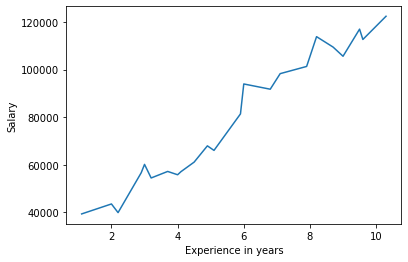

In [14]:
plt.plot(x_train, y_train)
plt.xlabel("Experience in years")
plt.ylabel("Salary")
plt.show()

In [25]:
def linear_regression(x, y, learning_rate, iterations, theta0, theta1):
    n = float(len(x))
    for i in range(iterations):
        prec_y = theta0 + theta1*x
        theta1 = theta1 - (-2/n)*np.sum(x * (y - prec_y))*learning_rate
        theta0 = theta0 - (-2/n)*np.sum(y - prec_y)*learning_rate
    return (theta0, theta1)

In [26]:
print(linear_regression(x_train, y_train, 0.0001, 10000, 0, 0))

(8402.21922139043, 11958.428699413906)


In [27]:
print(linear_regression(x_train, y_train, 0.0001, 10000, 0, 0)[0])

8402.21922139043


In [41]:
(theta0, theta1) = linear_regression(x_train, y_train, 0.0002, 30000, 0, 0)

In [42]:
print(f"Slope: {theta1}\nIntercept: {theta0}")

Slope: 10136.852526872284
Intercept: 20938.593429415432


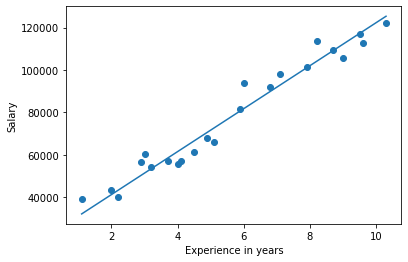

In [43]:
prec_y = theta0 + theta1*x_train
plt.scatter(x_train, y_train)
plt.xlabel("Experience in years")
plt.ylabel("Salary")
plt.plot([min(x_train), max(x_train)], [min(prec_y), max(prec_y)])
plt.show()

In [44]:
model_prec = theta0 + theta1*x_test
model_prec #testing data output from model parameters

1      34116.501714
2      36143.872220
8      53376.521515
10     60472.318284
12     61486.003537
17     74663.911822
29    127375.544962
Name: YearsExperience, dtype: float64

In [45]:
n = len(x_test)
meanSquare = (1/n)*np.sum(np.square(y_test-model_prec))
cost = np.sqrt(meanSquare)
print(cost)

7563.699881257977


## Multiple Linear Regression (3.1.2)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./housingPrices.csv', header=None, delim_whitespace=True)
n = len(data)
data.shape

(506, 14)

In [3]:
train_data = data.sample(frac = 0.8, random_state = 25)
test_data = data.drop(train_data.index)
print(train_data.shape)

(405, 14)


In [4]:
train_data = train_data.values
test_data = test_data.values
print(test_data.shape)

(101, 14)


In [5]:
train_y = train_data[:, -1].reshape(train_data.shape[0], 1) # all rows and last column
train_x = train_data[:, :-1] # all rows and columns(except last column)

In [6]:
test_y = test_data[:, -1].reshape(test_data.shape[0], 1)
test_x = test_data[:, :-1]

In [7]:
train_x = np.c_[np.ones(train_x.shape[0]), train_x]
test_x = np.c_[np.ones(test_x.shape[0]), test_x]
print(train_x.shape)
print(test_x.shape)

(405, 14)
(101, 14)


In [8]:
def gradient_descent(x, y, learning_rate, iterations):
    m = y.size
    theta = np.zeros((x.shape[1], 1))
#     cost_list = []
    for i in range(iterations):
        prec_y = np.dot(x, theta)
        cost = (1/(2*m))*np.sum(np.square(prec_y - y))
        theta = theta - learning_rate*(1/m)*np.dot(x.T, prec_y-y)
#         cost_list.append(cost)
        if(i % (iterations/10) == 0):
            print(f"Cost: {cost}")
    return theta

In [10]:
theta = gradient_descent(train_x, train_y, 0.000005, 500000)

Cost: 298.84829629629627
Cost: 19.84771688334405
Cost: 17.678868134719522
Cost: 16.140328865301385
Cost: 15.024895429668973
Cost: 14.214835703851927
Cost: 13.625728473057716
Cost: 13.196660559812997
Cost: 12.883608654558083
Cost: 12.654717844389664


In [11]:
yTestPrec = np.dot(test_x, theta)

In [12]:
m = yTestPrec.shape[0]
error = (1/m)*np.sum(np.square(yTestPrec - test_y))
error = np.sqrt(error)
print(error)

5.3297955443715415
